<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #6**

### _2020.08._ SKKU Lecture Summary by IOAH


---





### 1. Decision Tree 분류기를 이용하여 iris dataset 분석

이번 실습에선 decision tree 분류기를 이용하여 실습#5에서 했던 iris data set을 분석해보도록 하겠다. 우선 iris data set을 살펴보면 다음과 같다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


우리는 이 데이터의 많은 feature 중 sepal에 관련된 두 개의 feature만 이용해서 학습을 할 것이다. 두개의 feature만 선택하는 이유는 visualization이 비교적 편리하기 때문이다. 따라서 이 데이터들을 의사 결정 나무 모델을 통해서 학습하고 각 점들을 예측한 후 이 결과를 2차원으로 visualizing함으로써 decision boundary를 확인해보겠다. 우선 가장 디폴트 상태부터 차례대로 파라미터를 변경해가면서 실습을 진행해보도록 하겠다.

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 1.JPG to 1.JPG
Saving 2.JPG to 2.JPG
Saving 3.JPG to 3.JPG
Saving 4.JPG to 4.JPG
User uploaded file "1.JPG" with length 24434 bytes
User uploaded file "2.JPG" with length 22724 bytes
User uploaded file "3.JPG" with length 19315 bytes
User uploaded file "4.JPG" with length 21388 bytes


*	[random_state=0, criterion = ‘gini’, splitter = ‘best’, max_depth=5]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

##아래 하이퍼파라미터 수정으로 결과 확인
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5)
import matplotlib.colors as colors

df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)", "target" ]]
X = df1.iloc[:,0:2]
Y = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

clf.fit(X,Y)
N=100

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


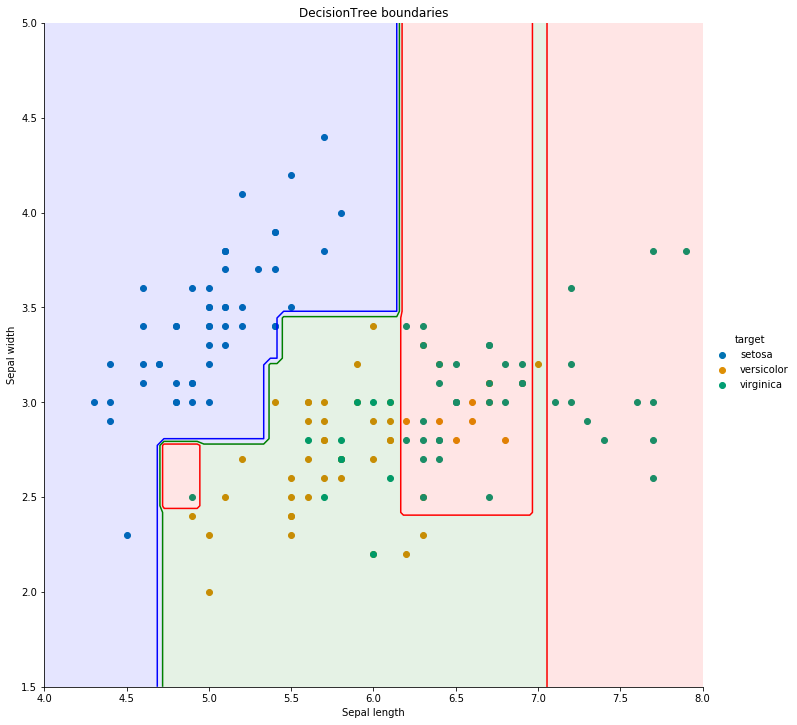

In [ ]:
X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sn.FacetGrid(iris_frame, hue = "target", size =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [clf.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('DecisionTree boundaries')

plt.show()

* Max_depth 차례대로 3, 7, 10. 나머지 1과 동일

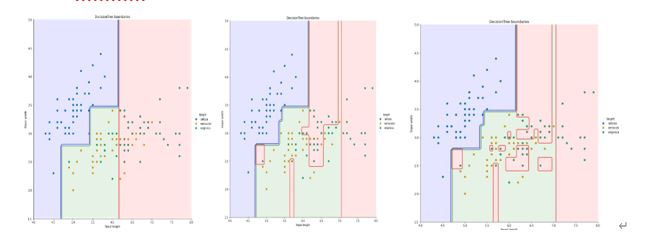

In [2]:
from IPython.display import Image
Image('1.JPG')

*	Random_state 차례대로 3, 5, 10. 나머지 1과 동일

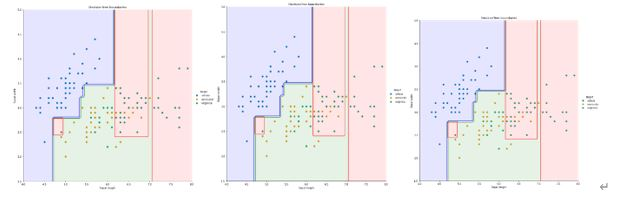

In [3]:
from IPython.display import Image
Image('2.JPG')

*	Criterion 차례대로 gini, entropy. 나머지 1과 동일

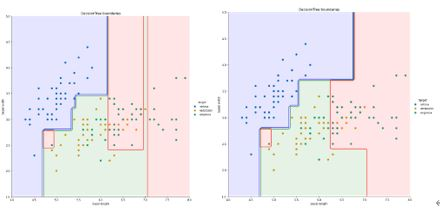

In [4]:
from IPython.display import Image
Image('3.JPG')

*	Splitter 차례대로 best, random. 나머지 1과 동일.

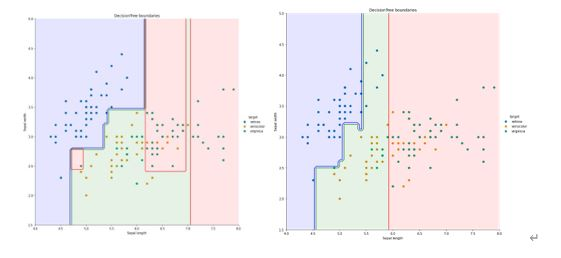

In [5]:
from IPython.display import Image
Image('4.JPG')

분석결과를 보면 각각의 parameter마다 다 다른 결과를 도출함을 볼 수 있다. 하지만 random_state는 숫자의 변화가 있어도 결과의 차이가 거의 없었으며 max_depth는 숫자가 커질수록 더 분류가 정교해지는 것을 볼 수 있다. 하지만 train set에 너무 fit하게 학습되면 overfitting이 일어날 수도 있으니 조심해야 할 것 같다. 또한 criterion 같은 경우 entropy보다 gini의 성능이 더 좋았으며 splitter는 random보다 best가 훨씬 분류가 잘 된 것을 볼 수 있다.